In [5]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

Stock name: DIS
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


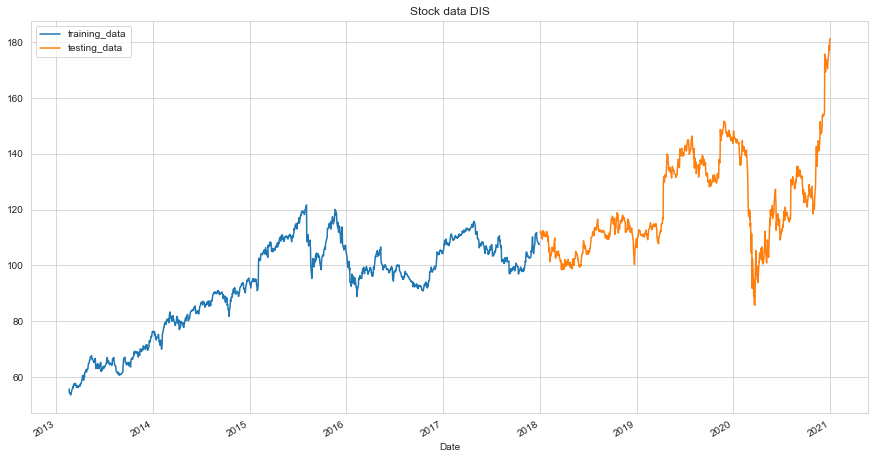

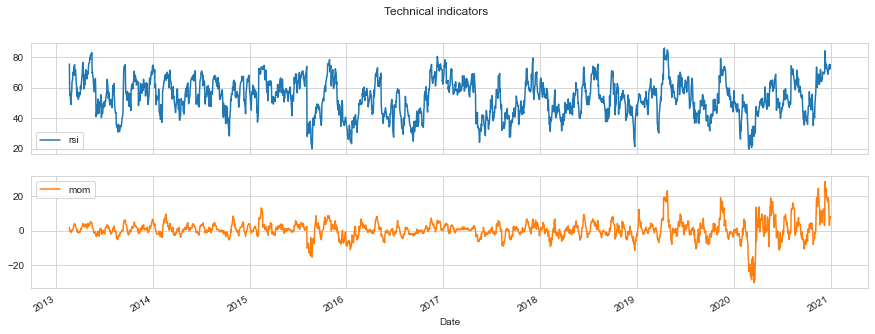

In [6]:
stock_name = 'dis'.upper()
industry = 'Consumer cyclical'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [10]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1376.27, duration: 0:00:00.197043
episode: 2/2000, episode end value: 1398.15, duration: 0:00:00.202057
episode: 3/2000, episode end value: 1370.21, duration: 0:00:00.199045
episode: 4/2000, episode end value: 1415.79, duration: 0:00:00.199045
episode: 5/2000, episode end value: 1363.01, duration: 0:00:00.198044
episode: 6/2000, episode end value: 1358.77, duration: 0:00:00.200594
episode: 7/2000, episode end value: 1367.21, duration: 0:00:00.199894
episode: 8/2000, episode end value: 1408.70, duration: 0:00:00.199302
episode: 9/2000, episode end value: 1375.55, duration: 0:00:00.187950
episode: 10/2000, episode end value: 1368.99, duration: 0:00:00.195046
episode: 11/2000, episode end value: 1358.46, duration: 0:00:00.199955
episode: 12/2000, episode end value: 1399.62, duration: 0:00:00.202999
episode: 13/2000, episode end value: 1358.20, duration: 0:00:00.205014
episode: 14/2000, episode end value: 1387.18, duration: 0:00:00.197987
episode: 15/200

episode: 117/2000, episode end value: 1379.19, duration: 0:00:00.195887
episode: 118/2000, episode end value: 1380.26, duration: 0:00:00.194094
episode: 119/2000, episode end value: 1516.93, duration: 0:00:00.203982
episode: 120/2000, episode end value: 1369.85, duration: 0:00:00.204009
episode: 121/2000, episode end value: 1550.15, duration: 0:00:00.204983
episode: 122/2000, episode end value: 1416.35, duration: 0:00:00.199909
episode: 123/2000, episode end value: 1375.06, duration: 0:00:00.214099
episode: 124/2000, episode end value: 1369.97, duration: 0:00:00.212929
episode: 125/2000, episode end value: 1388.43, duration: 0:00:00.220951
episode: 126/2000, episode end value: 1376.97, duration: 0:00:00.208080
episode: 127/2000, episode end value: 1401.46, duration: 0:00:00.215525
episode: 128/2000, episode end value: 1386.37, duration: 0:00:00.199729
episode: 129/2000, episode end value: 1379.21, duration: 0:00:00.215466
episode: 130/2000, episode end value: 1367.01, duration: 0:00:00

episode: 231/2000, episode end value: 1365.68, duration: 0:00:00.200057
episode: 232/2000, episode end value: 1352.73, duration: 0:00:00.199125
episode: 233/2000, episode end value: 1353.41, duration: 0:00:00.198963
episode: 234/2000, episode end value: 1375.55, duration: 0:00:00.197032
episode: 235/2000, episode end value: 1395.81, duration: 0:00:00.209047
episode: 236/2000, episode end value: 1376.64, duration: 0:00:00.203045
episode: 237/2000, episode end value: 1374.13, duration: 0:00:00.193045
episode: 238/2000, episode end value: 1416.11, duration: 0:00:00.199033
episode: 239/2000, episode end value: 1370.70, duration: 0:00:00.192028
episode: 240/2000, episode end value: 1389.46, duration: 0:00:00.191041
episode: 241/2000, episode end value: 1383.64, duration: 0:00:00.209047
episode: 242/2000, episode end value: 1405.14, duration: 0:00:00.204044
episode: 243/2000, episode end value: 1369.65, duration: 0:00:00.197052
episode: 244/2000, episode end value: 1366.77, duration: 0:00:00

episode: 345/2000, episode end value: 1388.29, duration: 0:00:00.206999
episode: 346/2000, episode end value: 1425.03, duration: 0:00:00.212981
episode: 347/2000, episode end value: 1391.67, duration: 0:00:00.202051
episode: 348/2000, episode end value: 1379.22, duration: 0:00:00.201033
episode: 349/2000, episode end value: 1374.33, duration: 0:00:00.203063
episode: 350/2000, episode end value: 1369.77, duration: 0:00:00.196040
episode: 351/2000, episode end value: 1340.19, duration: 0:00:00.208045
episode: 352/2000, episode end value: 1408.35, duration: 0:00:00.214029
episode: 353/2000, episode end value: 1386.72, duration: 0:00:00.202065
episode: 354/2000, episode end value: 1369.13, duration: 0:00:00.218061
episode: 355/2000, episode end value: 1410.80, duration: 0:00:00.215042
episode: 356/2000, episode end value: 1373.49, duration: 0:00:00.201032
episode: 357/2000, episode end value: 1384.08, duration: 0:00:00.217066
episode: 358/2000, episode end value: 1378.07, duration: 0:00:00

episode: 459/2000, episode end value: 1378.57, duration: 0:00:00.214061
episode: 460/2000, episode end value: 1386.15, duration: 0:00:00.208031
episode: 461/2000, episode end value: 1349.02, duration: 0:00:00.206047
episode: 462/2000, episode end value: 1387.03, duration: 0:00:00.224051
episode: 463/2000, episode end value: 1379.89, duration: 0:00:00.208048
episode: 464/2000, episode end value: 1402.76, duration: 0:00:00.207048
episode: 465/2000, episode end value: 1430.12, duration: 0:00:00.209045
episode: 466/2000, episode end value: 1396.63, duration: 0:00:00.212062
episode: 467/2000, episode end value: 1384.57, duration: 0:00:00.208035
episode: 468/2000, episode end value: 1389.36, duration: 0:00:00.228048
episode: 469/2000, episode end value: 1375.11, duration: 0:00:00.207047
episode: 470/2000, episode end value: 1449.94, duration: 0:00:00.183041
episode: 471/2000, episode end value: 1336.12, duration: 0:00:00.189043
episode: 472/2000, episode end value: 1401.48, duration: 0:00:00

episode: 573/2000, episode end value: 1377.42, duration: 0:00:00.227056
episode: 574/2000, episode end value: 1391.32, duration: 0:00:00.218913
episode: 575/2000, episode end value: 1378.99, duration: 0:00:00.214976
episode: 576/2000, episode end value: 1342.35, duration: 0:00:00.223996
episode: 577/2000, episode end value: 1383.67, duration: 0:00:00.237019
episode: 578/2000, episode end value: 1379.39, duration: 0:00:00.240189
episode: 579/2000, episode end value: 1376.63, duration: 0:00:00.221048
episode: 580/2000, episode end value: 1376.76, duration: 0:00:00.233054
episode: 581/2000, episode end value: 1383.24, duration: 0:00:00.202043
episode: 582/2000, episode end value: 1374.22, duration: 0:00:00.205043
episode: 583/2000, episode end value: 1372.57, duration: 0:00:00.205045
episode: 584/2000, episode end value: 1334.77, duration: 0:00:00.222058
episode: 585/2000, episode end value: 1373.02, duration: 0:00:00.219040
episode: 586/2000, episode end value: 1381.60, duration: 0:00:00

episode: 688/2000, episode end value: 1389.52, duration: 0:00:00.194524
episode: 689/2000, episode end value: 1401.63, duration: 0:00:00.194955
episode: 690/2000, episode end value: 1369.79, duration: 0:00:00.199985
episode: 691/2000, episode end value: 1361.35, duration: 0:00:00.205308
episode: 692/2000, episode end value: 1352.24, duration: 0:00:00.197117
episode: 693/2000, episode end value: 1419.19, duration: 0:00:00.199042
episode: 694/2000, episode end value: 1373.68, duration: 0:00:00.197038
episode: 695/2000, episode end value: 1360.83, duration: 0:00:00.199052
episode: 696/2000, episode end value: 1351.62, duration: 0:00:00.193036
episode: 697/2000, episode end value: 1366.84, duration: 0:00:00.200950
episode: 698/2000, episode end value: 1357.05, duration: 0:00:00.207037
episode: 699/2000, episode end value: 1350.52, duration: 0:00:00.197060
episode: 700/2000, episode end value: 1359.70, duration: 0:00:00.205038
episode: 701/2000, episode end value: 1405.69, duration: 0:00:00

episode: 802/2000, episode end value: 1386.60, duration: 0:00:00.223053
episode: 803/2000, episode end value: 1381.06, duration: 0:00:00.229050
episode: 804/2000, episode end value: 1404.55, duration: 0:00:00.214049
episode: 805/2000, episode end value: 1399.41, duration: 0:00:00.209047
episode: 806/2000, episode end value: 1378.99, duration: 0:00:00.214056
episode: 807/2000, episode end value: 1385.73, duration: 0:00:00.221043
episode: 808/2000, episode end value: 1376.53, duration: 0:00:00.209046
episode: 809/2000, episode end value: 1375.18, duration: 0:00:00.232036
episode: 810/2000, episode end value: 1387.75, duration: 0:00:00.216825
episode: 811/2000, episode end value: 1392.71, duration: 0:00:00.209366
episode: 812/2000, episode end value: 1371.23, duration: 0:00:00.208055
episode: 813/2000, episode end value: 1373.80, duration: 0:00:00.211054
episode: 814/2000, episode end value: 1397.27, duration: 0:00:00.225043
episode: 815/2000, episode end value: 1384.51, duration: 0:00:00

episode: 916/2000, episode end value: 1366.18, duration: 0:00:00.209044
episode: 917/2000, episode end value: 1444.57, duration: 0:00:00.201046
episode: 918/2000, episode end value: 1376.58, duration: 0:00:00.175041
episode: 919/2000, episode end value: 1436.25, duration: 0:00:00.206047
episode: 920/2000, episode end value: 1359.19, duration: 0:00:00.185039
episode: 921/2000, episode end value: 1356.87, duration: 0:00:00.189043
episode: 922/2000, episode end value: 1390.76, duration: 0:00:00.192055
episode: 923/2000, episode end value: 1366.28, duration: 0:00:00.229040
episode: 924/2000, episode end value: 1378.94, duration: 0:00:00.202565
episode: 925/2000, episode end value: 1398.24, duration: 0:00:00.214049
episode: 926/2000, episode end value: 1357.81, duration: 0:00:00.203055
episode: 927/2000, episode end value: 1388.41, duration: 0:00:00.194044
episode: 928/2000, episode end value: 1520.01, duration: 0:00:00.210045
episode: 929/2000, episode end value: 1400.39, duration: 0:00:00

episode: 1031/2000, episode end value: 1395.98, duration: 0:00:00.202041
episode: 1032/2000, episode end value: 1375.45, duration: 0:00:00.201046
episode: 1033/2000, episode end value: 1374.14, duration: 0:00:00.205047
episode: 1034/2000, episode end value: 1391.30, duration: 0:00:00.195064
episode: 1035/2000, episode end value: 1373.87, duration: 0:00:00.194037
episode: 1036/2000, episode end value: 1390.80, duration: 0:00:00.197043
episode: 1037/2000, episode end value: 1354.01, duration: 0:00:00.196047
episode: 1038/2000, episode end value: 1407.53, duration: 0:00:00.196042
episode: 1039/2000, episode end value: 1371.25, duration: 0:00:00.189043
episode: 1040/2000, episode end value: 1429.17, duration: 0:00:00.195058
episode: 1041/2000, episode end value: 1362.62, duration: 0:00:00.193012
episode: 1042/2000, episode end value: 1381.10, duration: 0:00:00.197064
episode: 1043/2000, episode end value: 1396.56, duration: 0:00:00.198051
episode: 1044/2000, episode end value: 1401.75, dur

episode: 1145/2000, episode end value: 1358.63, duration: 0:00:00.190050
episode: 1146/2000, episode end value: 1383.87, duration: 0:00:00.199038
episode: 1147/2000, episode end value: 1397.76, duration: 0:00:00.193043
episode: 1148/2000, episode end value: 1368.61, duration: 0:00:00.195046
episode: 1149/2000, episode end value: 1361.76, duration: 0:00:00.193079
episode: 1150/2000, episode end value: 1373.41, duration: 0:00:00.192912
episode: 1151/2000, episode end value: 1355.72, duration: 0:00:00.197178
episode: 1152/2000, episode end value: 1364.88, duration: 0:00:00.194047
episode: 1153/2000, episode end value: 1406.44, duration: 0:00:00.195169
episode: 1154/2000, episode end value: 1400.91, duration: 0:00:00.190442
episode: 1155/2000, episode end value: 1357.10, duration: 0:00:00.200033
episode: 1156/2000, episode end value: 1386.51, duration: 0:00:00.193040
episode: 1157/2000, episode end value: 1385.19, duration: 0:00:00.192050
episode: 1158/2000, episode end value: 1408.91, dur

episode: 1258/2000, episode end value: 1358.68, duration: 0:00:00.197035
episode: 1259/2000, episode end value: 1367.67, duration: 0:00:00.188231
episode: 1260/2000, episode end value: 1370.53, duration: 0:00:00.194990
episode: 1261/2000, episode end value: 1411.59, duration: 0:00:00.177599
episode: 1262/2000, episode end value: 1384.93, duration: 0:00:00.181042
episode: 1263/2000, episode end value: 1402.83, duration: 0:00:00.197047
episode: 1264/2000, episode end value: 1355.15, duration: 0:00:00.194041
episode: 1265/2000, episode end value: 1373.18, duration: 0:00:00.193043
episode: 1266/2000, episode end value: 1382.07, duration: 0:00:00.195044
episode: 1267/2000, episode end value: 1405.21, duration: 0:00:00.201045
episode: 1268/2000, episode end value: 1382.84, duration: 0:00:00.195166
episode: 1269/2000, episode end value: 1397.10, duration: 0:00:00.191035
episode: 1270/2000, episode end value: 1432.09, duration: 0:00:00.195034
episode: 1271/2000, episode end value: 1353.38, dur

episode: 1371/2000, episode end value: 1371.55, duration: 0:00:00.206046
episode: 1372/2000, episode end value: 1349.99, duration: 0:00:00.229052
episode: 1373/2000, episode end value: 1422.52, duration: 0:00:00.215046
episode: 1374/2000, episode end value: 1377.95, duration: 0:00:00.209049
episode: 1375/2000, episode end value: 1379.23, duration: 0:00:00.201029
episode: 1376/2000, episode end value: 1334.39, duration: 0:00:00.217049
episode: 1377/2000, episode end value: 1374.42, duration: 0:00:00.224050
episode: 1378/2000, episode end value: 1364.50, duration: 0:00:00.197043
episode: 1379/2000, episode end value: 1354.66, duration: 0:00:00.214047
episode: 1380/2000, episode end value: 1382.05, duration: 0:00:00.205047
episode: 1381/2000, episode end value: 1405.57, duration: 0:00:00.205046
episode: 1382/2000, episode end value: 1392.78, duration: 0:00:00.201043
episode: 1383/2000, episode end value: 1401.04, duration: 0:00:00.198046
episode: 1384/2000, episode end value: 1387.37, dur

episode: 1485/2000, episode end value: 1342.07, duration: 0:00:00.199045
episode: 1486/2000, episode end value: 1378.59, duration: 0:00:00.197052
episode: 1487/2000, episode end value: 1376.88, duration: 0:00:00.218042
episode: 1488/2000, episode end value: 1382.79, duration: 0:00:00.235053
episode: 1489/2000, episode end value: 1383.76, duration: 0:00:00.220062
episode: 1490/2000, episode end value: 1375.12, duration: 0:00:00.202045
episode: 1491/2000, episode end value: 1372.37, duration: 0:00:00.224051
episode: 1492/2000, episode end value: 1358.37, duration: 0:00:00.207063
episode: 1493/2000, episode end value: 1374.44, duration: 0:00:00.205211
episode: 1494/2000, episode end value: 1374.06, duration: 0:00:00.201035
episode: 1495/2000, episode end value: 1335.08, duration: 0:00:00.201054
episode: 1496/2000, episode end value: 1378.79, duration: 0:00:00.202036
episode: 1497/2000, episode end value: 1347.57, duration: 0:00:00.205061
episode: 1498/2000, episode end value: 1390.51, dur

episode: 1598/2000, episode end value: 1397.61, duration: 0:00:00.176176
episode: 1599/2000, episode end value: 1364.56, duration: 0:00:00.181114
episode: 1600/2000, episode end value: 1386.76, duration: 0:00:00.186022
episode: 1601/2000, episode end value: 1556.46, duration: 0:00:00.196044
episode: 1602/2000, episode end value: 1450.33, duration: 0:00:00.190706
episode: 1603/2000, episode end value: 1378.81, duration: 0:00:00.192035
episode: 1604/2000, episode end value: 1423.39, duration: 0:00:00.199045
episode: 1605/2000, episode end value: 1380.20, duration: 0:00:00.198044
episode: 1606/2000, episode end value: 1378.63, duration: 0:00:00.200052
episode: 1607/2000, episode end value: 1378.10, duration: 0:00:00.214061
episode: 1608/2000, episode end value: 1438.79, duration: 0:00:00.206026
episode: 1609/2000, episode end value: 1377.75, duration: 0:00:00.202556
episode: 1610/2000, episode end value: 1374.87, duration: 0:00:00.199051
episode: 1611/2000, episode end value: 1379.15, dur

episode: 1711/2000, episode end value: 1375.73, duration: 0:00:00.197044
episode: 1712/2000, episode end value: 1368.80, duration: 0:00:00.192119
episode: 1713/2000, episode end value: 1370.58, duration: 0:00:00.199024
episode: 1714/2000, episode end value: 1385.65, duration: 0:00:00.206749
episode: 1715/2000, episode end value: 1358.05, duration: 0:00:00.191042
episode: 1716/2000, episode end value: 1380.77, duration: 0:00:00.198038
episode: 1717/2000, episode end value: 1417.88, duration: 0:00:00.196045
episode: 1718/2000, episode end value: 1366.64, duration: 0:00:00.202046
episode: 1719/2000, episode end value: 1367.22, duration: 0:00:00.221063
episode: 1720/2000, episode end value: 1382.36, duration: 0:00:00.201030
episode: 1721/2000, episode end value: 1370.78, duration: 0:00:00.209053
episode: 1722/2000, episode end value: 1350.22, duration: 0:00:00.199045
episode: 1723/2000, episode end value: 1389.78, duration: 0:00:00.212048
episode: 1724/2000, episode end value: 1400.83, dur

episode: 1825/2000, episode end value: 1379.09, duration: 0:00:00.214036
episode: 1826/2000, episode end value: 1379.43, duration: 0:00:00.214048
episode: 1827/2000, episode end value: 1399.62, duration: 0:00:00.233061
episode: 1828/2000, episode end value: 1378.84, duration: 0:00:00.219032
episode: 1829/2000, episode end value: 1383.94, duration: 0:00:00.234053
episode: 1830/2000, episode end value: 1375.04, duration: 0:00:00.218553
episode: 1831/2000, episode end value: 1340.21, duration: 0:00:00.209054
episode: 1832/2000, episode end value: 1376.59, duration: 0:00:00.217041
episode: 1833/2000, episode end value: 1371.12, duration: 0:00:00.217049
episode: 1834/2000, episode end value: 1386.57, duration: 0:00:00.207053
episode: 1835/2000, episode end value: 1359.70, duration: 0:00:00.204045
episode: 1836/2000, episode end value: 1391.21, duration: 0:00:00.208046
episode: 1837/2000, episode end value: 1407.91, duration: 0:00:00.200044
episode: 1838/2000, episode end value: 1388.19, dur

episode: 1938/2000, episode end value: 1377.77, duration: 0:00:00.209026
episode: 1939/2000, episode end value: 1359.97, duration: 0:00:00.205046
episode: 1940/2000, episode end value: 1363.81, duration: 0:00:00.198044
episode: 1941/2000, episode end value: 1355.76, duration: 0:00:00.200046
episode: 1942/2000, episode end value: 1370.67, duration: 0:00:00.195042
episode: 1943/2000, episode end value: 1407.77, duration: 0:00:00.205046
episode: 1944/2000, episode end value: 1423.94, duration: 0:00:00.214046
episode: 1945/2000, episode end value: 1362.46, duration: 0:00:00.198043
episode: 1946/2000, episode end value: 1380.70, duration: 0:00:00.186053
episode: 1947/2000, episode end value: 1398.58, duration: 0:00:00.188029
episode: 1948/2000, episode end value: 1403.70, duration: 0:00:00.190041
episode: 1949/2000, episode end value: 1428.93, duration: 0:00:00.202552
episode: 1950/2000, episode end value: 1389.30, duration: 0:00:00.194045
episode: 1951/2000, episode end value: 1386.45, dur

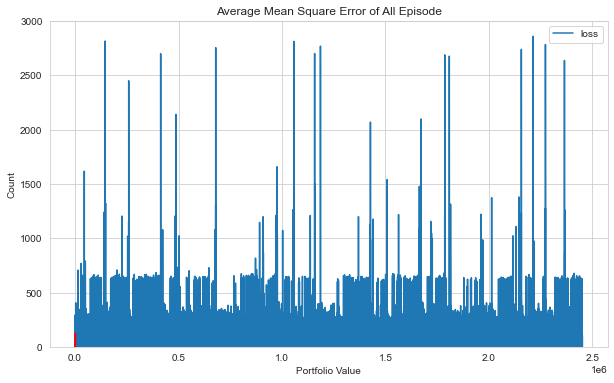

In [5]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

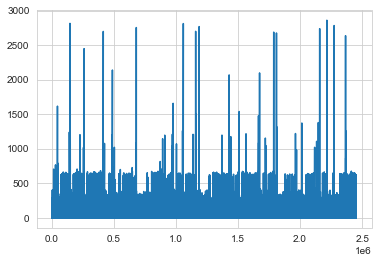

In [6]:
plt.plot(agent.model.losses)

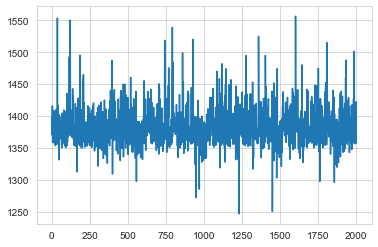

In [7]:
plt.plot(portfolio_value)

In [11]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'scaler/DIS.pkl'

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: DIS


NameError: name 'result' is not defined

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')

NameError: name 'result' is not defined